In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
# Step 2: Load the Dataset
# Assuming the dataset is stored in a CSV file
df = pd.read_csv('weed_herbicide_data.csv')
df.head()

,Weed_Variety,Herbicide_Name,Application_Rate,Effectiveness,Region,Notes
0,Sphenoclea zeylanica,Atrazine,3.5 L/ha,Medium,Northern Province,Synthetic data for example purposes
1,Imperata cylindrica,Atrazine,2.0 L/ha,Medium,Northern Province,Synthetic data for example purposes
2,Cyperus rotundus,"2,4-D",2.0 L/ha,Medium,Eastern Province,Synthetic data for example purposes
3,Echinochloa crus-galli,"2,4-D",2.0 L/ha,High,Eastern Province,Synthetic data for example purposes
4,Echinochloa crus-galli,MCPA,2.5 L/ha,Low,Northern Province,Synthetic data for example purposes


In [3]:
# Step 2: Preprocess the 'Application_Rate' to extract only numeric values
# Extract numeric values from 'Application_Rate' and store them in a new column
df['Application_Rate_Numeric'] = df['Application_Rate'].str.extract(r'([\d\.]+)', expand=False)

# Convert to float
df['Application_Rate_Numeric'] = df['Application_Rate_Numeric'].astype(float)

In [4]:
# Step 3: Apply LabelEncoder to input categorical variables
label_encoder_weed = LabelEncoder()
label_encoder_effectiveness = LabelEncoder()
label_encoder_region = LabelEncoder()

# Fit and transform the categorical variables using LabelEncoder
df['Weed_Variety_Encoded'] = label_encoder_weed.fit_transform(df['Weed_Variety'])
df['Effectiveness_Encoded'] = label_encoder_effectiveness.fit_transform(df['Effectiveness'])
df['Region_Encoded'] = label_encoder_region.fit_transform(df['Region'])

In [5]:
# Step 4: Data Augmentation (Increase the dataset to 9000 rows)
def augment_data(df, target_size):
    # Calculate how many times we need to duplicate the data
    current_size = len(df)
    multiplier = (target_size // current_size) + 1
    
    # Duplicate the data
    df_augmented = pd.concat([df] * multiplier, ignore_index=True)
    
    # Add randomness to the numeric column (Application_Rate_Numeric)
    df_augmented['Application_Rate_Numeric'] += np.random.normal(0, 0.1, size=len(df_augmented))
    
    # Drop rows to match the target size exactly
    df_augmented = df_augmented[:target_size]
    
    return df_augmented

In [6]:
# Increase the dataset size to 100000 rows
df_augmented = augment_data(df, 100000)

In [7]:
# Step 5: Encode the target variable 'Herbicide_Name'
label_encoder_target = LabelEncoder()
df_augmented['Herbicide_Name'] = label_encoder_target.fit_transform(df_augmented['Herbicide_Name'])

# Step 6: Separate input features and target variable
X = df_augmented[['Weed_Variety_Encoded', 'Effectiveness_Encoded', 'Region_Encoded', 'Application_Rate_Numeric']]
y = df_augmented['Herbicide_Name']  # Target variable (Herbicide_Name)

In [8]:
# Step 7: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 6: Train and Test 3 Models (Random Forest, Decision Tree, Logistic Regression)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')

Random Forest Accuracy: 45.97%


In [10]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy * 100:.2f}%')

Decision Tree Accuracy: 45.98%


In [11]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)  # Setting max_iter to ensure convergence
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%')

Logistic Regression Accuracy: 23.21%


In [12]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


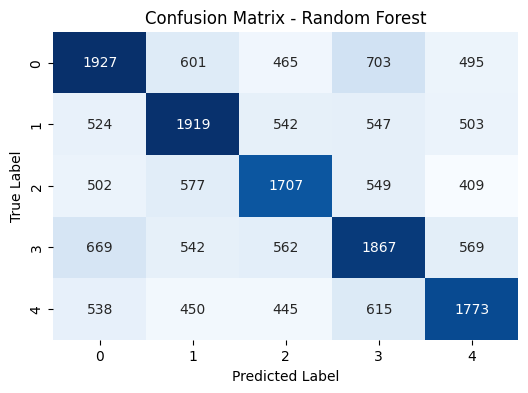

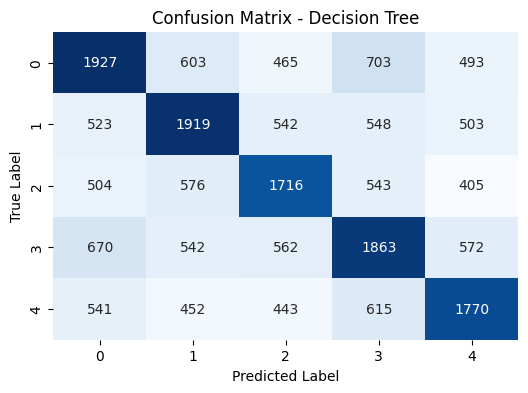

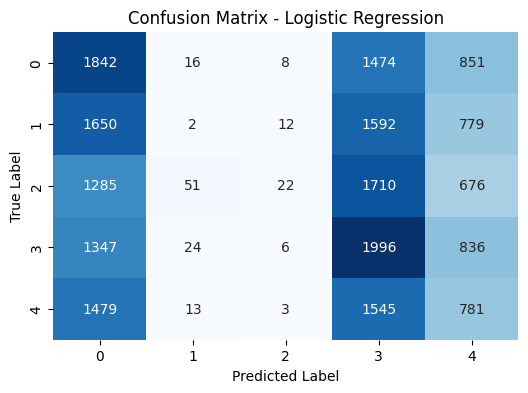

In [13]:
# Plot confusion matrices for all three models
plot_confusion_matrix(y_test, rf_predictions, "Random Forest")
plot_confusion_matrix(y_test, dt_predictions, "Decision Tree")
plot_confusion_matrix(y_test, lr_predictions, "Logistic Regression")

In [14]:
import joblib

# Save the logistic regression model to a file
joblib.dump(rf_model, 'random_forest_model.pkl')

print("Random Forest model saved as 'random_forest_model.pkl'")

Random Forest model saved as 'random_forest_model.pkl'


In [15]:
# Save the LabelEncoder for 'Herbicide_Name'
joblib.dump(label_encoder_weed, 'label_encoder_weed.pkl')
joblib.dump(label_encoder_effectiveness, 'label_encoder_effect.pkl')
joblib.dump(label_encoder_region, 'label_encoder_region.pkl')

joblib.dump(label_encoder_target, 'label_encoder_target.pkl')

print("All of the label encoders for the columns are saved.")

All of the label encoders for the columns are saved.


In [16]:
import joblib

# Load the saved LabelEncoders
label_encoder_weed = joblib.load('label_encoder_weed.pkl')
label_encoder_effectiveness = joblib.load('label_encoder_effect.pkl')
label_encoder_region = joblib.load('label_encoder_region.pkl')
label_encoder_target = joblib.load('label_encoder_target.pkl')

# Check the classes in each LabelEncoder
print("Classes in label_encoder_weed:", label_encoder_weed.classes_)
print("Classes in label_encoder_effectiveness:", label_encoder_effectiveness.classes_)
print("Classes in label_encoder_region:", label_encoder_region.classes_)
print("Classes in label_encoder_target:", label_encoder_target.classes_)


Classes in label_encoder_weed: ['Amaranthus spinosus' 'Cyperus rotundus' 'Echinochloa crus-galli'
 'Imperata cylindrica' 'Sphenoclea zeylanica']
Classes in label_encoder_effectiveness: ['High' 'Low' 'Medium']
Classes in label_encoder_region: ['Central Province' 'Eastern Province' 'Northern Province'
 'Southern Province' 'Western Province']
Classes in label_encoder_target: ['2,4-D' 'Atrazine' 'Glyphosate' 'MCPA' 'Propanil']


In [17]:
import pandas as pd
import joblib

# Step 1: Load the saved random forest model and label encoders
loaded_model = joblib.load('random_forest_model.pkl')
loaded_label_weed = joblib.load('label_encoder_weed.pkl')
loaded_label_effect = joblib.load('label_encoder_effect.pkl')
loaded_label_region = joblib.load('label_encoder_region.pkl')
loaded_label_target = joblib.load('label_encoder_target.pkl')

# Step 2: Input new sample data
sample_data = pd.DataFrame({
    'Weed_Variety': ['Cyperus rotundus'],          
    'Application_Rate_Numeric': [1.2],           
    'Effectiveness': ['Medium'], 
    'Region': ['Eastern Province']        
})

# Step 3: Preprocess the sample input (apply LabelEncoders)
sample_data['Weed_Variety_Encoded'] = loaded_label_weed.transform(sample_data['Weed_Variety'])
sample_data['Effectiveness_Encoded'] = loaded_label_effect.transform(sample_data['Effectiveness'])
sample_data['Region_Encoded'] = loaded_label_region.transform(sample_data['Region'])

# Step 4: Ensure the column order matches X used in training
X_columns = ['Weed_Variety_Encoded', 'Effectiveness_Encoded', 'Region_Encoded', 'Application_Rate_Numeric']
X_sample = sample_data[X_columns]

# Step 5: Make predictions using the loaded Random Forest model
rf_prediction = loaded_model.predict(X_sample)

# Convert the numeric prediction back to the original target label (Herbicide_Name)
rf_predicted_label = loaded_label_target.inverse_transform(rf_prediction)

# Step 6: Display the predicted output
print(f'Random Forest Predicted Herbicide: {rf_predicted_label[0]}')


Random Forest Predicted Herbicide: Propanil
